**Instalación de Librerías**

In [ ]:
!pip install -q pyannote.audio==1.1
!pip install ffmpeg moviepy

     |████████████████████████████████| 235kB 7.9MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 133kB 34.7MB/s 
     |████████████████████████████████| 296kB 26.3MB/s 
     |████████████████████████████████| 1.2MB 36.3MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 481kB 50.2MB/s 
     |████████████████████████████████| 112kB 57.7MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 143kB 52.4MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp37-none-any.whl size=6083 sha256=fd068a5db02b89187def9f141009adb12d3cb907bac4a423eac611bed627451e
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


**Cargar carpeta de google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!wget https://bgstorageutils.blob.core.windows.net/customerprojects/UNL/DatasetUNL.7z
#!7za e DatasetUNL.7z

In [ ]:
!cp -r drive/MyDrive/pasantias/data/ ./

**Extracción del audio**

In [ ]:
import moviepy.editor as mp
video = mp.VideoFileClip(r"data/videos/D181C9A3-1850-48A8-B299-7D99B58B0F07_B4DDF6C0-2116-44AE-8899-79D2B19B25CF_Customer Projects Meeting.mp4")
video.audio.write_audiofile(r"data/audios/audio.wav")

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1654784/45929032 bytes (3.6%)5095424/45929032 bytes (11.1%)9240576/45929032 bytes (20.1%)13090816/45929032 bytes (28.5%)17244160/45929032 bytes (37.5%)21184512/45929032 bytes (46.1%)25264128/45929032 bytes (55.0%)29351936/45929032 bytes (63.9%)33398784/45929032 bytes (72.7%)34643968/45929032 bytes (75.4%)36986880/45929032 bytes (80.5%)39395328/45929032 bytes (85.8%)

100%|██████████| 87553/87553 [00:29<00:00, 2946.37it/s]

[MoviePy] Done.


In [ ]:
#!wget -q https://raw.githubusercontent.com/pyannote/pyannote-audio/master/tutorials/data_preparation/AMI/MixHeadset.test.rttm

In [ ]:
from pyannote.audio.features import RawAudio
from IPython.display import Audio
FILE = {'audio': 'data/audios/audio.wav'}

**Opcion scd_ami (espectrograma)**

In [8]:
import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia')
diarization = pipeline(FILE)

Downloading: "https://github.com/pyannote/pyannote-audio/archive/master.zip" to /root/.cache/torch/hub/master.zip


Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


Using cache found in /root/.cache/torch/hub/pyannote_pyannote-audio_master


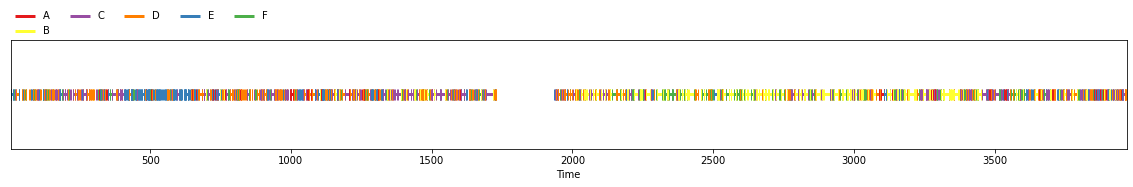

In [9]:
diarization

In [10]:
#diarization.for_json()

In [11]:
pip install pydub


In [12]:
from pydub import AudioSegment
import csv

In [13]:
!mkdir data/audios/speakers

with open('data.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["Id", "Start", "End","path"])
  song = AudioSegment.from_wav("data/audios/audio.wav")
  combined = AudioSegment.empty()
  id = ''
  startG = ''
  endG = ''
  for turn, _, speaker in diarization.itertracks(yield_label=True):
    start = int(turn.start*1000)
    end = int(turn.end*1000)
    if id!=speaker :
      if len(id)>0:
        path = "data/audios/speakers/"+speaker+"-"+str(startG)+"-"+str(endG)+".wav"
        writer.writerow([speaker, startG, endG, path])
        combined.export(path, format="wav")
        combined = AudioSegment.empty()
      id=speaker
      startG = start
    endG=end
    aud = song[start:end]
    combined += aud
    

